In [1]:
!pip install rdkit


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 23.9 MB/s eta 0:00:00


In [2]:
from rdkit import Chem
from rdkit.Chem import Draw
from IPython.display import SVG
from rdkit.Chem import rdDepictor as rdd
from rdkit.Chem.Draw import rdMolDraw2D as draw2d
from rdkit import DataStructs
from rdkit.Chem.Fingerprints.FingerprintMols import FingerprintMol

I retrieved the molecule database from chembl. The database originally contained a lot of information about the molecule such as chembl_id	canonical_smiles, standard_inchi and standard_inchi_key arranged in columns. In order to cut the database to only contain the canonical smiles, I used bash: cat chembl_34_chemreps.txt | cut -d$'/t' -f 2 where chembl_34_chemreps.txt was the original file name.

In [4]:
from google.colab import files
uploaded = files.upload()

Saving mol_database.txt to mol_database.txt


Here, I am only reading the first 50 lines from the database because of the large size of the database.

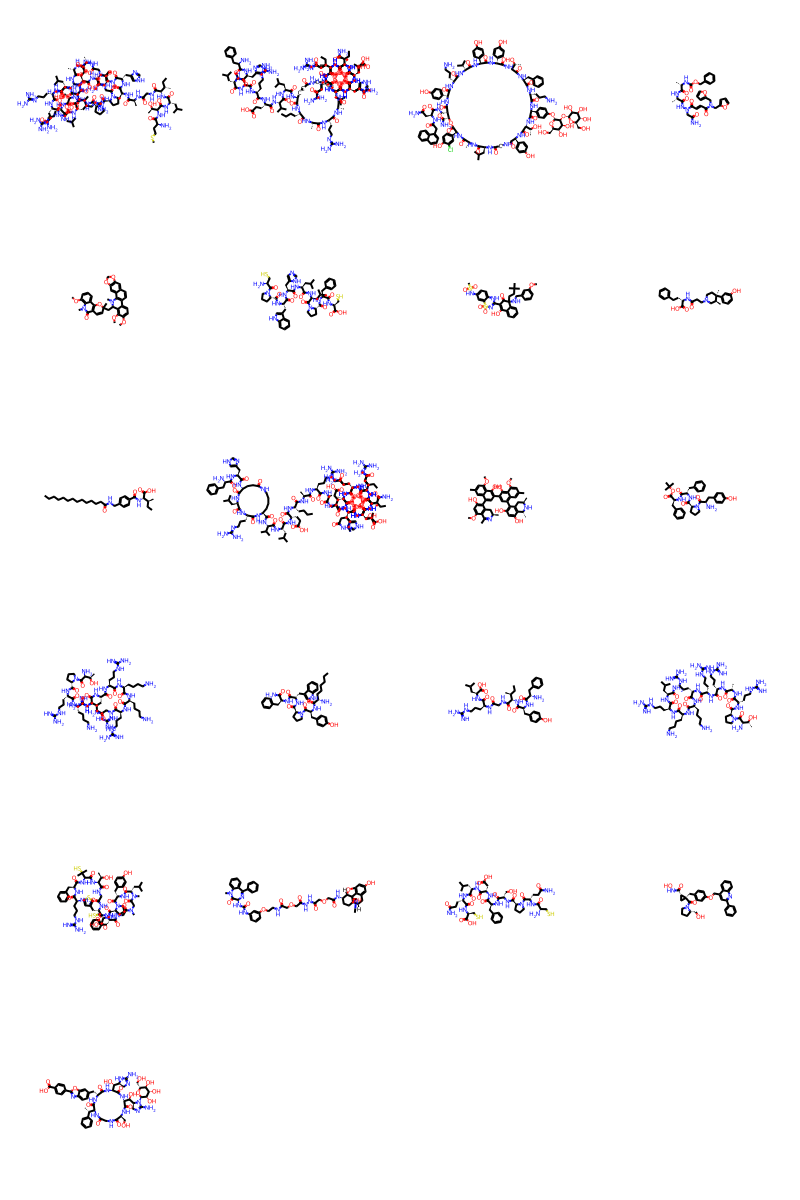

In [7]:
file_name = 'mol_database.txt'

smile_list = []

with open(file_name, 'r') as f:
    f.readline()
    #for line in f:  # Iterate over the file
    for i in range(50): #iterate over the first 50 lines
        line = f.readline().strip()  # Read each line, removing any extra spaces
        #print(line)  # Print the line
        smile_list.append(line)


mol_list = []
for smiles in smile_list:
    mol = Chem.MolFromSmiles(smiles)
    mol_list.append(mol)

pattern = Chem.MolFromSmiles('CC(N)C')
#the pattern can be changed depending on which substructure is being searched for

pattern_match = []
for mol in mol_list:
  if mol.HasSubstructMatch(pattern):
    pattern_match.append(mol)
img = Draw.MolsToGridImage(pattern_match, molsPerRow=4)
img



